In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from IPython.display import display
from pandas import ExcelWriter

## Load the Data

In [2]:
wind_data = pd.read_csv('la-haute-borne-data-2013-2016.csv',sep=';')

In [3]:
list(wind_data)

['Wind_turbine_name',
 'Date_time',
 'Ba_avg',
 'Ba_min',
 'Ba_max',
 'Ba_std',
 'Rt_avg',
 'Rt_min',
 'Rt_max',
 'Rt_std',
 'DCs_avg',
 'DCs_min',
 'DCs_max',
 'DCs_std',
 'Cm_avg',
 'Cm_min',
 'Cm_max',
 'Cm_std',
 'P_avg',
 'P_min',
 'P_max',
 'P_std',
 'Q_avg',
 'Q_min',
 'Q_max',
 'Q_std',
 'S_avg',
 'S_min',
 'S_max',
 'S_std',
 'Cosphi_avg',
 'Cosphi_min',
 'Cosphi_max',
 'Cosphi_std',
 'Ds_avg',
 'Ds_min',
 'Ds_max',
 'Ds_std',
 'Db1t_avg',
 'Db1t_min',
 'Db1t_max',
 'Db1t_std',
 'Db2t_avg',
 'Db2t_min',
 'Db2t_max',
 'Db2t_std',
 'Dst_avg',
 'Dst_min',
 'Dst_max',
 'Dst_std',
 'Gb1t_avg',
 'Gb1t_min',
 'Gb1t_max',
 'Gb1t_std',
 'Gb2t_avg',
 'Gb2t_min',
 'Gb2t_max',
 'Gb2t_std',
 'Git_avg',
 'Git_min',
 'Git_max',
 'Git_std',
 'Gost_avg',
 'Gost_min',
 'Gost_max',
 'Gost_std',
 'Ya_avg',
 'Ya_min',
 'Ya_max',
 'Ya_std',
 'Yt_avg',
 'Yt_min',
 'Yt_max',
 'Yt_std',
 'Ws1_avg',
 'Ws1_min',
 'Ws1_max',
 'Ws1_std',
 'Ws2_avg',
 'Ws2_min',
 'Ws2_max',
 'Ws2_std',
 'Ws_avg',
 'Ws_min'

In [4]:
# Defining the columns to keep
cols_2_keep = ['Date_time', 'P_avg', 'P_min', 'P_max', 'P_std', 'Ws1_avg', 'Ws1_min', 'Ws1_max', 'Ws1_std', 'Ws2_avg', 'Ws2_min', \
               'Ws2_max', 'Ws2_std', 'Ws_avg', 'Ws_min', 'Ws_max', 'Ws_std']

# process the data
turbines = {}
index = 1
for name in wind_data.Wind_turbine_name.unique():
    # Splitting data based on wind turbine (1-4)
    turbine_name = 'turbine_{}'.format(index)
    turbine_data = wind_data.loc[wind_data['Wind_turbine_name'] == name]
    
    # Cleaning each turbine data by removing Nan's in the wind speed column
    turbine_data_clean = turbine_data[np.isfinite(turbine_data['Ws1_avg'])]
    turbines[turbine_name] = turbine_data_clean.loc[:, cols_2_keep]
    index += 1

In [5]:
# Converting date_time column to datetime variable and picking out day,month,hour,minute and year
for key in turbines.keys():
    turbines[key]['Date_time'] = pd.to_datetime(turbines[key]['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
    turbines[key]['Day'] = turbines[key]['Date_time'].dt.day;
    turbines[key]['Month'] = turbines[key]['Date_time'].dt.month;
    turbines[key]['Hour'] = turbines[key]['Date_time'].dt.hour;
    turbines[key]['Minute'] = turbines[key]['Date_time'].dt.minute;
    turbines[key]['Year'] = turbines[key]['Date_time'].dt.year;

# Sorting the rows based on the date time
for key in turbines.keys():
    turbine_sorted = turbines[key].sort_values(by = 'Date_time')
    turbines[key] = turbine_sorted.set_index('Date_time')
    
turbines['turbine_1'].head()

,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [6]:
# use the intersection of time of all 4 turbines and keep the common times
idx = turbines['turbine_1'].index.intersection(turbines['turbine_2'].index)
idx2 = turbines['turbine_3'].index.intersection(idx)
idx3 = turbines['turbine_4'].index.intersection(idx2)

for key in turbines.keys():
    turbines[key] = turbines[key].loc[idx3]
    
print (len(turbines['turbine_1']))
print (len(turbines['turbine_2']))
print (len(turbines['turbine_3']))
print (len(turbines['turbine_4']))
turbines['turbine_1'].head()

207789
207789
207789
207789


,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [7]:
list(turbines['turbine_1'])

['P_avg',
 'P_min',
 'P_max',
 'P_std',
 'Ws1_avg',
 'Ws1_min',
 'Ws1_max',
 'Ws1_std',
 'Ws2_avg',
 'Ws2_min',
 'Ws2_max',
 'Ws2_std',
 'Ws_avg',
 'Ws_min',
 'Ws_max',
 'Ws_std',
 'Day',
 'Month',
 'Hour',
 'Minute',
 'Year']

In [8]:
np.any(np.isnan(turbines['turbine_4']))

False

## Getting the X matrix as 70% of the features (sequentially)

### Right now, use turbine 1 to predict turbine 2, 3, 4


In [19]:
# Getting X vector from turbine 1 data sequentially
x_turb_1_train = turbines['turbine_1'][0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['P_avg','Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbines['turbine_1'][145452:]
x_turb_1_test = x_turb_1_test.loc[:,['P_avg','Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)
x_train

array([[1.0726500e+03, 8.9600000e+00, 2.0120000e+03, ..., 3.1000000e+01,
        2.3000000e+01, 0.0000000e+00],
       [1.0614301e+03, 8.8900003e+00, 2.0120000e+03, ..., 3.1000000e+01,
        2.3000000e+01, 1.0000000e+01],
       [1.1447900e+03, 9.1899996e+00, 2.0120000e+03, ..., 3.1000000e+01,
        2.3000000e+01, 2.0000000e+01],
       ...,
       [4.5164999e+02, 6.4099998e+00, 2.0150000e+03, ..., 2.2000000e+01,
        1.0000000e+00, 1.0000000e+01],
       [4.1857001e+02, 6.1900001e+00, 2.0150000e+03, ..., 2.2000000e+01,
        1.0000000e+00, 2.0000000e+01],
       [4.5938000e+02, 6.3699999e+00, 2.0150000e+03, ..., 2.2000000e+01,
        1.0000000e+00, 3.0000000e+01]])

In [20]:
# combine all turbines power data to get the wind farm generation data
wind_farm_powerdata = turbines['turbine_1'].P_avg + turbines['turbine_2'].P_avg + turbines['turbine_3'].P_avg + turbines['turbine_4'].P_avg
y_farm_train = wind_farm_powerdata[0:145452]
y_train = np.array(y_farm_train)

y_farm_test = wind_farm_powerdata[145452:]
y_test = np.array(y_farm_test)

In [10]:
# # Getting Y vector from turbine 2 data
# y_turb_2_train = turbines['turbine_2'][0:145452]
# y_turb_2_train = y_turb_2_train.loc[:,['P_avg']]
# y_train = np.array(y_turb_2_train)

# y_turb_2_test = turbines['turbine_2'][145452:]
# y_turb_2_test = y_turb_2_test.loc[:,['P_avg']]
# y_test = np.array(y_turb_2_test)

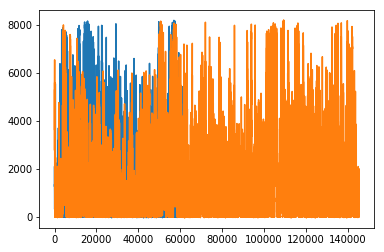

In [17]:
plt.plot(y_test)
plt.plot(y_train)

(145452, 1)
(145452, 1)


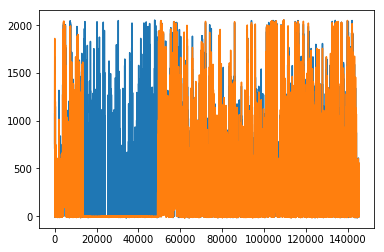

In [12]:
x_train_plot = np.array(x_turb_1_train.loc[:,['P_avg']])

plt.plot(x_train_plot)
plt.plot(y_train)

print(x_train_plot.shape)
print(y_train.shape)

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 223803.35


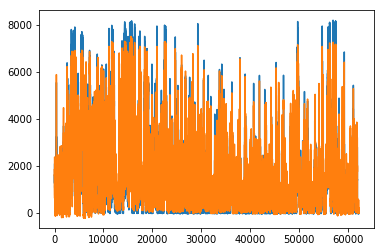

In [22]:
# Plotting them
plt.plot(y_test)
plt.plot(y_pred)

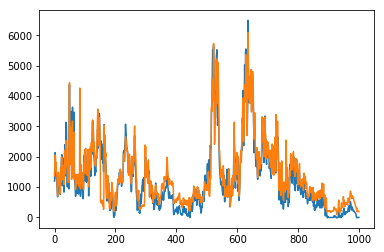

In [23]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])

### Doing prediction with no P_avg of turbine 1

Mean squared error: 71744.72


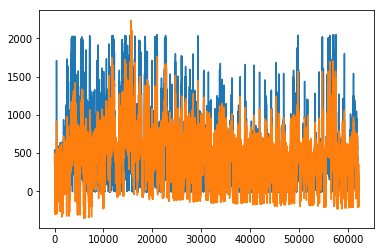

In [17]:
# Getting X vector from turbine 1 data sequentially
x_turb_1_train = turbines['turbine_1'][0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbines['turbine_1'][145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 2 data
y_turb_2_train = turbines['turbine_2'][0:145452]
y_turb_2_train = y_turb_2_train.loc[:,['P_avg']]
y_train = np.array(y_turb_2_train)

y_turb_2_test = turbines['turbine_2'][145452:]
y_turb_2_test = y_turb_2_test.loc[:,['P_avg']]
y_test = np.array(y_turb_2_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them

plt.plot(y_test)
plt.plot(y_pred)

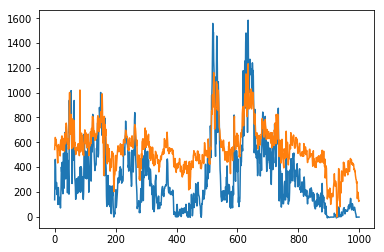

In [18]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])

Mean squared error: 38029.64


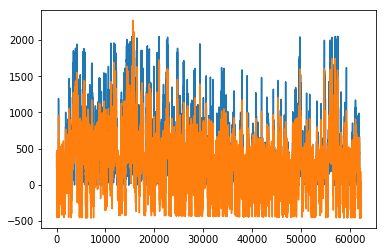

In [19]:
# Getting X vector from turbine 1 data sequentially
x_turb_1_train = turbines['turbine_1'][0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbines['turbine_1'][145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 3 data
y_turb_3_train = turbines['turbine_3'][0:145452]
y_turb_3_train = y_turb_3_train.loc[:,['P_avg']]
y_train = np.array(y_turb_3_train)

y_turb_3_test = turbines['turbine_3'][145452:]
y_turb_3_test = y_turb_3_test.loc[:,['P_avg']]
y_test = np.array(y_turb_3_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Plotting them
plt.plot(y_test)
plt.plot(y_pred)

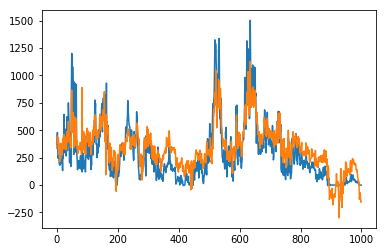

In [20]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])

# Tensorflow recurrent neuron networks

In [28]:
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

In [45]:
turbines['turbine_1']['P_avg']

Date_time
2012-12-31 23:00:00    1072.650000
2012-12-31 23:10:00    1061.430100
2012-12-31 23:20:00    1144.790000
2012-12-31 23:30:00    1183.980000
2012-12-31 23:40:00    1317.550000
2012-12-31 23:50:00    1282.110000
2013-01-01 00:00:00    1303.770000
2013-01-01 00:10:00    1276.150000
2013-01-01 00:20:00    1286.340000
2013-01-01 00:30:00    1081.100000
2013-01-01 00:40:00    1062.010000
2013-01-01 00:50:00    1194.160000
2013-01-01 01:00:00    1199.260000
2013-01-01 01:10:00    1223.950000
2013-01-01 01:20:00    1289.120000
2013-01-01 01:30:00    1153.230000
2013-01-01 01:40:00     983.159970
2013-01-01 01:50:00     707.099980
2013-01-01 02:00:00     808.429990
2013-01-01 02:10:00     897.750000
2013-01-01 02:20:00    1083.740000
2013-01-01 02:30:00    1109.780000
2013-01-01 02:40:00    1217.550000
2013-01-01 02:50:00    1363.689900
2013-01-01 03:00:00    1272.030000
2013-01-01 03:10:00    1387.510000
2013-01-01 03:20:00    1618.439900
2013-01-01 03:30:00    1293.720000
2013-01-01

In [84]:
x_turb_RNN_train = turbines['turbine_1']['P_avg'][:200001]
# x_turb_RNN_train = x_turb_RNN_train.loc[:,['P_avg','Ws_avg','Year','Month','Day','Hour','Minute']]
x_turb = np.array(x_turb_RNN_train)

# we will divide the data into 100 periods, and we will forecast 1 period into the future
num_periods = 1000
f_horizon = 10

x_data = x_turb[:(len(x_turb) - (len(x_turb) % num_periods))]
x_batches = x_data.reshape(-1,1000,1)

y_data = x_turb[1:(len(x_turb) - (len(x_turb) % num_periods)) + f_horizon]
y_batches = y_data.reshape(-1,1000,1)
print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:2])

200
(200, 1000, 1)
[[[ 1.0726500e+03]
  [ 1.0614301e+03]
  [ 1.1447900e+03]
  ...
  [-1.5000001e-01]
  [-7.6999998e-01]
  [-3.3000001e-01]]

 [[-2.8000000e-01]
  [-7.9000002e-01]
  [-1.9000000e-01]
  ...
  [ 2.9426999e+02]
  [ 3.3210999e+02]
  [ 3.9626001e+02]]]


In [85]:
len(y_data)

200000

## make the test data

In [88]:
def test_data(series, forecast, num_periods):
    test_x_setup = x_data[-(num_periods+forecast):]
    test_x = test_x_setup[:num_periods].reshape(-1,num_periods,1)
    test_y = x_data[-(num_periods):].reshape(-1,num_periods,1)
    return test_x, test_y

x_test, y_test = test_data(x_data, f_horizon, num_periods)
print(x_test.shape)
print(x_test)
print(len(x_test))

(1, 1000, 1)
[[[ 1.0309000e+02]
  [ 1.6787000e+02]
  [ 1.3419000e+02]
  [ 9.4790001e+01]
  [ 7.4669998e+01]
  [ 1.7731000e+02]
  [ 1.4230000e+02]
  [ 7.5389999e+01]
  [ 2.6730000e+01]
  [ 7.5230003e+01]
  [ 4.4869999e+01]
  [ 7.5919998e+01]
  [ 1.0029000e+02]
  [ 1.2261000e+02]
  [ 1.0296000e+02]
  [ 9.5430000e+01]
  [ 1.6710001e+02]
  [ 1.5831000e+02]
  [ 3.0364001e+02]
  [ 2.6851999e+02]
  [ 2.7297000e+02]
  [ 3.1451999e+02]
  [ 3.3663000e+02]
  [ 3.6748001e+02]
  [ 2.9360999e+02]
  [ 3.1032999e+02]
  [ 2.0275000e+02]
  [ 1.7345000e+02]
  [ 2.4769000e+02]
  [ 2.2174001e+02]
  [ 2.6101999e+02]
  [ 3.1950000e+02]
  [ 3.5448999e+02]
  [ 3.7622000e+02]
  [ 4.6472000e+02]
  [ 5.2016998e+02]
  [ 4.8339001e+02]
  [ 4.4176999e+02]
  [ 4.4019000e+02]
  [ 4.8539001e+02]
  [ 5.8621997e+02]
  [ 6.1908002e+02]
  [ 6.0228998e+02]
  [ 6.6665997e+02]
  [ 6.6390997e+02]
  [ 5.2014001e+02]
  [ 5.3234003e+02]
  [ 4.9292001e+02]
  [ 3.9560999e+02]
  [ 2.9438000e+02]
  [ 2.7204999e+02]
  [ 2.2603999e+02]

### Create TensorFlow graph that will do the computation

In [59]:
tf.reset_default_graph()
    
num_periods = 30  #number of periods per vector we are using to predict 1 period ahead
input = 1         #number of vectors submitted
hidden = 100      #number of neurons we will recursively work through
output = 1        #number of output vectors

# create variable objects
x = tf.placeholder(tf.float32, [None, num_periods, input])
y = tf.placeholder(tf.float32, [None, num_periods, output])


basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu) #create RNN object 
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, x, dtype=tf.float32) #choose dynamic over static 

learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])  #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)  #specify the type of layer (dense)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])  #shape results

loss = tf.reduce_sum(tf.square(outputs - y))   # define the cost function
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)  # gradient descent
training_op = optimizer.minimize(loss)  #train the results of the application of the cost function

init = tf.global_variables_initializer()   #intiailize all the variables

In [62]:
epochs = 1000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={x:x_batches, y:y_batches})
    if ep % 100 == 0:
        mse = loss.eval(feed_dict={x:x_batches, y:y_batches})
        print(ep, "\tMSE:", mse)
        
    y_pred = sess.run(outputs, feed_dict={x:x_test})
    print(y_pred)

[[[ 1.1233767]
  [ 2.119423 ]
  [ 3.3234248]
  [ 3.0974488]
  [ 3.1127565]
  [ 2.63479  ]
  [ 1.0097246]
  [ 2.7725663]
  [ 3.5306509]
  [ 1.2399178]
  [ 4.123519 ]
  [ 7.1562715]
  [ 2.1640012]
  [ 2.8987997]
  [ 2.4720128]
  [ 1.7296611]
  [ 1.0400599]
  [ 2.448013 ]
  [ 2.3473349]
  [ 3.2602437]
  [ 3.3467453]
  [ 2.0742502]
  [ 2.9285088]
  [ 3.2248416]
  [ 1.6681955]
  [15.4282675]
  [ 7.236106 ]
  [-0.9519005]
  [-3.166947 ]
  [-4.258848 ]]]


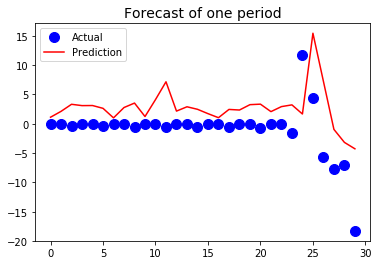

In [65]:
plt.title('Forecast of one period', size=14)
plt.plot(pd.Series(np.ravel(y_test)), 'bo', markersize=10, label='Actual')
plt.plot(pd.Series(np.ravel(y_pred)), 'r', markersize=10, label='Prediction')
plt.legend()
plt.show()